<a href="https://colab.research.google.com/github/mitsurukikkawa/Python/blob/master/200927_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考
http://i.cla.kobe-u.ac.jp/murao/class/2015-SeminarB3/



In [3]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file
!pip install mecab-python3==0.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl libio-string

In [49]:
import re

# ファイル読み込み
f=open('waganeko.txt','r')
text = f.read()
f.close()

# フッタの除去
text = re.split('底本：',text)[0]

# 最初の一の除去
text = re.sub('一', '', text,1)

# 空行の削除
text = re.sub('\n\n', '\n', text)

# print(text)

In [50]:
import MeCab

# Mecab で形態素解析
tagger = MeCab.Tagger("-Owakati")
result = tagger.parse(text)

# print(result)
with open('waganeko_words.txt', mode='w') as f:
  print(result,file=f)
f.close()

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

hana=open('hana_words.txt','r').read()
kokoro=open('kokoro_words.txt','r').read()
kumo=open('kumo_words.txt','r').read()
merosu=open('merosu_words.txt','r').read()
ningen=open('ningen_words.txt','r').read()
rasho=open('rasho_words.txt','r').read()
sorekara=open('sorekara_words.txt','r').read()
waganeko=open('waganeko_words.txt','r').read()

# 単語リストの確認
print("%s" % merosu)


走れ メロス 太宰 治 　 メロス は 激怒 し た 。 必ず 、 かの 邪智 暴虐 の 王 を 除か なけれ ば なら ぬ と 決意 し た 。 メロス に は 政治 が わから ぬ 。 メロス は 、 村 の 牧人 で ある 。 笛 を 吹き 、 羊 と 遊ん で 暮し て 来 た 。 けれども 邪悪 に対して は 、 人 倍 に 敏感 で あっ た 。 きょう 未明 メロス は 村 を 出発 し 、 野 を 越え 山越え 、 十 里 は なれ た 此 の シラクス の 市 に やって来 た 。 メロス に は 父 も 、 母 も 無い 。 女房 も 無い 。 十 六 の 、 内気 な 妹 と 二 人 暮し だ 。 この 妹 は 、 村 の 或 る 律 気 な 一 牧人 を 、 近々 、 花婿 として 迎える 事 に なっ て い た 。 結婚式 も 間近 か な の で ある 。 メロス は 、 それ ゆえ 、 花嫁 の 衣裳 やら 祝宴 の 御馳走 やら を 買い に 、 はるばる 市 に やって来 た の だ 。 先ず 、 その 品々 を 買い 集め 、 それから 都 の 大路 を ぶらぶら 歩い た 。 メロス に は 竹馬 の 友 が あっ た 。 セリヌンティウス で ある 。 今 は 此 の シラクス の 市 で 、 石工 を し て いる 。 その 友 を 、 これから 訪ね て みる つもり な の だ 。 久しく 逢わ なかっ た の だ から 、 訪ね て 行く の が 楽しみ で ある 。 歩い て いる うち に メロス は 、 まち の 様子 を 怪しく 思っ た 。 ひっそり し て いる 。 もう 既に 日 も 落ち て 、 まち の 暗い の は 当り まえ だ が 、 けれども 、 なんだか 、 夜 の せい ばかり で は 無く 、 市 全体 が 、 やけに 寂しい 。 のんき な メロス も 、 だんだん 不安 に なっ て 来 た 。 路 で 逢っ た 若い衆 を つかまえ て 、 何 か あっ た の か 、 二 年 まえ に 此 の 市 に 来 た とき は 、 夜 でも 皆 が 歌 を うたっ て 、 まち は 賑やか で あっ た 筈 だ が 、 と 質問 し た 。 若い衆 は 、 首 を 振っ て 答え なか

In [53]:
docs=[hana,kokoro,kumo,merosu,ningen,rasho,sorekara,waganeko]
vectorizer=TfidfVectorizer(use_idf=True,stop_words=['*'])
tfidfs=vectorizer.fit_transform(docs)

In [54]:
terms=vectorizer.get_feature_names()
print('%s' % ' ' .join(terms))

sentimentalisme ああ あえて あかく あからめ あがる あきれ あくる日 あけ あげよ あげる あす あすこ あたかも あたり あたりまえ あちこち あっ あっと あっぱれ あつ あつめ あて あてがっ あと あながち あなた あの あまり あまりに あら あらゆる あらわし あらわれ あり ありがたい ありがとう ありゃ ある あるい あるいは あるく あれ あろ あわただしく あんな あんまり あゝ あー いい いいえ いい加減 いう いえ いかなる いかに いかにも いきなり いきり立っ いくつ いくぶん いくら いけ いささか いざっ いずれ いたそ いた事 いちいち いちど いっ いっしょ いっそ いったい いっぱい いつ いつか いつのまに いつの間にか いつも いとも いに いね いのち いふ いま いまだに いまわしい いや いやがる いよ いよいよ いら いらっしゃい いらっしゃる いる いれ いろ いろいろ いわ いわゆる うけ うける うごめい うし うす うすい うずくまり うたい うたっ うち うつ うつし うつむき うとうと うに うまい うまく うめく うようよ うらみ うるさい うるさく うれしい うんと えい ええ えて えらい える おい おいおい おかしい おかず おくび おくれ おこ おさえ おさめ おさん おしゃれ おずおず おそろしい おそろしく おっ おっしゃい おっしゃる おっとり おとなしく おどかし おどろい おなか おののき おのれ おびただしく おべっか おぼろ おまえ おめでとう おら おり おれ おろし お互い お伴 お前 お参り お詫び かい かう かえって かかえ かかっ かかる かかわら かがめ かき かきつけ かく かくし かくして かくれ かけ かける かこう かこま かざし かしら かすか かすれ かた かたがた かたまり かっと かつ かつて かな かなり かなわ かね かねる かの かぶせ かも から からかっ からだ からっぽ からみ かる かれ かれこれ かん がかり がたい がたがた がち がっ がら がる がわり きい きかせ きく きっ きっと きのう きまっ きめ きもの きょう きらい きらきら きり きれ ぎらぎら ぎり ぎりにして ぎりほとんど くぐり抜け 

In [56]:
tfidfs.toarray()[0]

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.01231122])

In [58]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.9,whiten=False)
pca.fit(tfidfs.toarray())
pca.n_components_

6

In [67]:
for i in range(pca.n_components_):
    tc=zip(pca.components_[i],terms)
    tc.sort()
    # tc.reverse()
    print("[PCA%d]" % (i+1))
    for v,t in tc[:10]:
           print("%f,%s" % (v,t))

AttributeError: ignored

In [68]:
x=pca.transform(tfidfs.toarray())

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

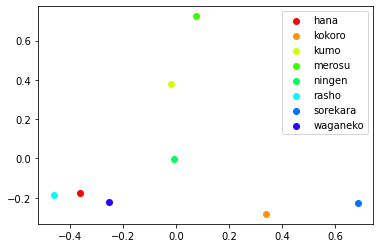

In [78]:
from matplotlib import pyplot
pyplot.ion()
pyplot.clf()

name=['hana','kokoro','kumo','merosu','ningen','rasho','sorekara','waganeko']

colors=[pyplot.cm.hsv(0.1*i,1) for i in range(len(name))]

for i in range(len(name)):
    pyplot.scatter(x[i,0],x[i,1],c=colors[i],label=name[i])

pyplot.legend()
